# Global feedbacks analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and plot a linegraph of the results across the ensemble. 

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import Deltas_SW
from Fonctions import Deltas_LW

# Read files : radiative budget, tas

## Second PPE : amip and amip-future4K

In [3]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['rlut', 'rsut','rsdt','tas']

path = path_official
filename = '*_CNRM-CM6-1_amip_*.nc'
start_yr = 1979
drop = True
year_list = range(1982,2015,1)
official_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
official_amip

path = path_official
filename = '*_CNRM-CM6-1_amip-future4K_*.nc'
start_yr = 1979
drop = True
year_list = range(1982,2015,1)
official_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
official_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,246.033493,100.208107,340.698730,291.714813,340.698730,346.241608,-5.542877
1,246.036575,100.286873,340.691254,291.756744,340.691254,346.323456,-5.632202
2,246.216858,100.169746,340.688416,291.737305,340.688416,346.386597,-5.698181


In [5]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE1/'
variables = ['rlut', 'rsut','rsdt','tas']

path = path_PPE+'/CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p1f2/'
filename = '*_CNRM-CM6-1_amip_*.nc'
start_yr = 1979
drop = False
year_list = None
p1_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
p1_amip

start_yr = 1951
path = path_PPE+'/CNRM-CM6-1_amip-future4K_PPE/CNRM-CM6-1_amip-future4K_r1i1p1f2/'
filename = '*_CNRM-CM6-1_amip-future4K_*.nc'
p1_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
p1_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,245.847061,99.844887,340.496674,291.295715,340.496674,345.691956,-5.195282
1,245.930023,100.026192,340.500641,291.433716,340.500641,345.956207,-5.455566
2,246.320786,99.984657,340.466858,291.496887,340.466858,346.305450,-5.838593
3,246.335007,99.894569,340.467224,291.325195,340.467224,346.229584,-5.762360
4,246.418381,99.600266,340.520782,291.306335,340.520782,346.018646,-5.497864


In [8]:
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']

len(nb_p_list)

74

In [11]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE3/'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip experiments, new ensemble LHS500 : 

start_yr=1979
drop=False
year_list=None
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']
N=len(nb_p_list)
amip={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip_PPE_ENSEMBLE3/CNRM-CM6-1_amip_r1i1'+nb_p+'f2/'
    filename = '*_CNRM-CM6-1_amip_r1i1'+nb_p+'f2*.nc'
    amip[str(nb_p) + "_amip"] = get_wavg_budget_df(path, filename, variables, \
                                                                start_yr, drop, year_list)
    i=i+1
    

p600
p601
p602
p603
p604
p605
p607
p608
p609
p610
p611
p612
p613
p614
p615
p616
p617
p618
p619
p621
p623
p625
p626
p627
p629
p630
p631
p632
p633
p634
p636
p638
p639
p640
p641
p642
p644
p646
p649
p650
p651
p652
p653
p655
p656
p657
p658
p661
p662
p663
p664
p666
p668
p669
p670
p671
p674
p675
p676
p677
p678
p679
p680
p681
p682
p683
p684
p685
p686
p687
p688
p689
p690


In [12]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE3/'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip experiments, new ensemble LHS500 : 

start_yr=1979
drop=False
year_list=None
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']
N=len(nb_p_list)
future4K={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip-future4K_PPE_ENSEMBLE3/CNRM-CM6-1_amip-future4K_r1i1'+nb_p+'f2/'
    filename = '*_CNRM-CM6-1_amip-future4K_r1i1'+nb_p+'f2*.nc'
    future4K[str(nb_p) + "_future4K"] = get_wavg_budget_df(path, filename, variables, \
                                                                start_yr, drop, year_list)
    i=i+1

p600
p601
p602
p603
p604
p605
p606
p607
p608
p609
p610
p611
p612
p613
p614
p615
p616
p617
p618
p619
p621
p623
p625
p626
p627
p629
p630
p631
p632
p633
p634
p636
p638
p639
p640
p641
p642
p644
p646
p649
p650
p651
p652
p653
p655
p656
p657
p658
p661
p662
p663
p664
p666
p668
p669
p670
p671
p674
p675
p676
p677
p678
p679
p680
p681
p682
p683
p684
p685
p686
p687
p688
p689
p690


## Create plot

In [16]:
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']

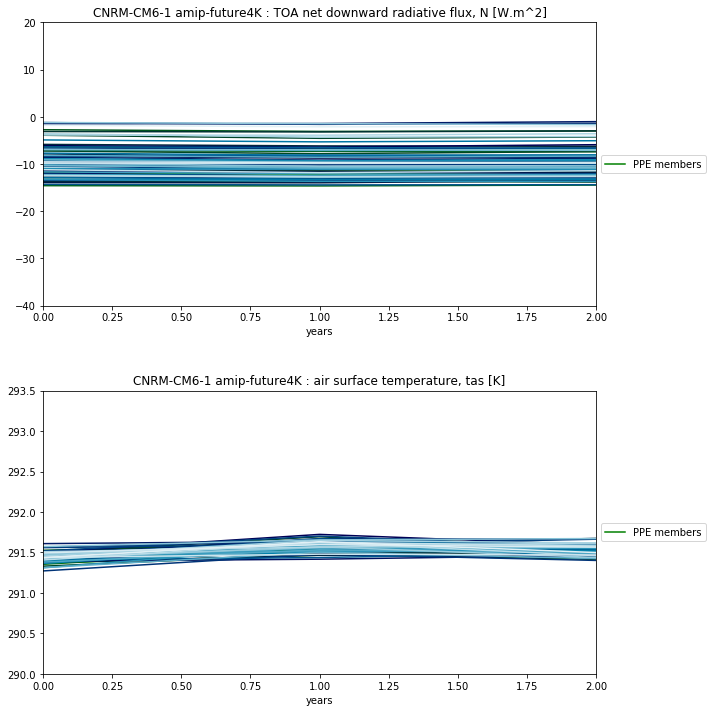

In [17]:
# PARAMETERS :
n=len(future4K)
df=[None]*n
#df[0] = official_future4K
#df[1] = p1_future4K
df[:] = [future4K[i+"_future4K"] for i in nb_p_list]
cmap1 = plt.get_cmap('ocean')
colors = [cmap1(i) for i in np.linspace(0, 1, (len(future4K)+2))]
linewidth = [1.5]
i=0
N=len(df)
while i<N:
    linewidth.append(1.5)
    i=i+1
    
xlabel = 'years'
xmin = 0
xmax = 2
legend = ['PPE members']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CNRM-CM6-1 amip-future4K : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -40.0
ymax = 20.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CNRM-CM6-1 amip-future4K : air surface temperature, tas [K]'
y = 'tas'
ymin = 290.0
ymax = 293.5
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas_future4K.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

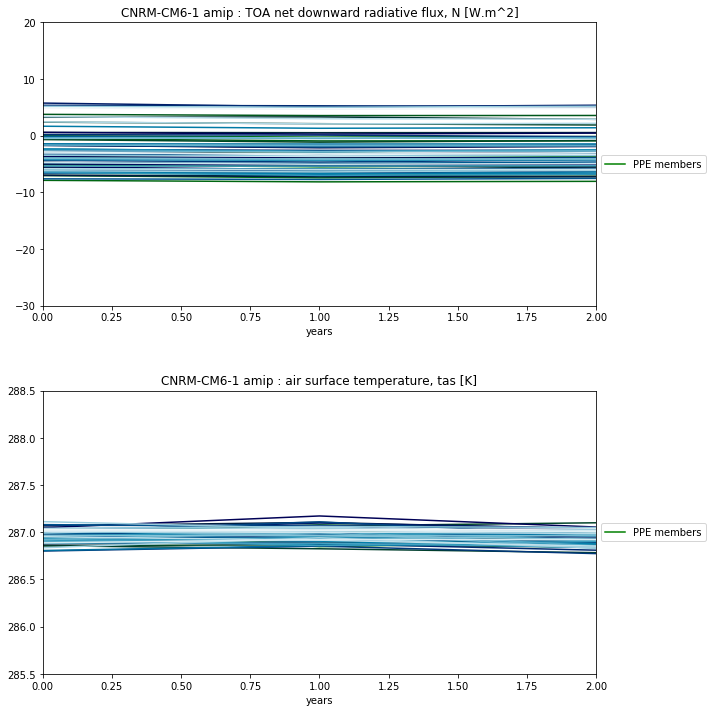

In [18]:
# PARAMETERS :
n=len(amip)
df=[None]*n
#df[0] = official_amip
#df[1] = p1_amip
df[:] = [amip[i+"_amip"] for i in nb_p_list]
cmap1 = plt.get_cmap('ocean')
colors = [cmap1(i) for i in np.linspace(0, 1, len(amip)+2)]
linewidth = [1.5]
i=0
N=len(df)
while i<N:
    linewidth.append(1.5)
    i=i+1
    
xlabel = 'years'
xmin = 0
xmax = 2
legend = ['PPE members']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CNRM-CM6-1 amip : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -30.0
ymax = 20.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CNRM-CM6-1 amip : air surface temperature, tas [K]'
y = 'tas'
ymin = 285.5
ymax = 288.5
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas_amip.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

# Compute : Delta(TOA), Delta(tas), Lambda

In [19]:
official_amip

,rlut,rsut,rsdt,tas,F,H,N
0,238.267899,101.744835,340.698730,286.938538,340.698730,340.012726,0.686005
1,238.770569,101.704056,340.691254,287.068726,340.691254,340.474609,0.216644
2,238.196167,101.862389,340.688416,286.955109,340.688416,340.058563,0.629852


In [20]:
result = pd.DataFrame()
df_CTL = official_amip
df = official_future4K
expe_name = 'official_future4K'
n = len(df_CTL)
official_result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
official_result_SW = Deltas_SW(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
official_result_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
official_result_LW

,Delta_LW_official_future4K,Delta_tas_official_future4K,Lambda_LW_official_future4K
0,7.765594,4.776276,1.625868
1,7.515800,4.732147,1.588243
2,7.684097,4.748830,1.618103


In [21]:
result = pd.DataFrame()
df_CTL = p1_amip
df = p1_future4K
expe_name = 'p1_future4K'
n = len(df_CTL)
p1_result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
p1_result_SW = Deltas_SW(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
p1_result_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
p1_result_LW

,Delta_LW_p1_future4K,Delta_tas_p1_future4K,Lambda_LW_p1_future4K
0,7.563141,4.375641,1.728465
1,7.624748,4.408966,1.729373
2,7.757507,4.479523,1.731771
3,7.834129,4.450424,1.760311
4,7.894696,4.420733,1.785834


In [23]:
# We want to compute the Deltas and the feedbacks of each perturbations (amip - amip-future4K)
result= pd.DataFrame()

n = len(amip["p600_amip"])

for j in nb_p_list:
    df_CTL = amip[j+"_amip"]
    df = future4K[j+"_future4K"]
    expe_name=str(j+"_future4k")
       
    Lambda = Deltas_Lambda(result, df_CTL, df, expe_name, n)
    Lambda_SW = Deltas_SW(result, df_CTL, df, expe_name, n)
    Lambda_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
    
Lambda_SW

,Delta_N_p600_future4k,Delta_tas_p600_future4k,Lambda_p600_future4k,Delta_SW_p600_future4k,Lambda_SW_p600_future4k,Delta_LW_p600_future4k,Lambda_LW_p600_future4k,Delta_N_p601_future4k,Delta_tas_p601_future4k,Lambda_p601_future4k,...,Lambda_SW_p689_future4k,Delta_LW_p689_future4k,Lambda_LW_p689_future4k,Delta_N_p690_future4k,Delta_tas_p690_future4k,Lambda_p690_future4k,Delta_SW_p690_future4k,Lambda_SW_p690_future4k,Delta_LW_p690_future4k,Lambda_LW_p690_future4k
0,-6.694824,4.564331,-1.466770,-2.653343,-0.581321,9.348190,2.048096,-6.568726,4.426025,-1.484114,...,-0.600789,9.376022,2.094012,-6.703033,4.404968,-1.521698,-1.933548,-0.438947,8.636581,1.960646
1,-6.680756,4.619705,-1.446143,-3.096245,-0.670226,9.777008,2.116370,-6.649384,4.552429,-1.460623,...,-0.634794,9.349503,2.065140,-6.740692,4.506805,-1.495670,-2.136322,-0.474021,8.877014,1.969691
2,-6.598867,4.622141,-1.427664,-3.107005,-0.672200,9.705876,2.099866,-6.784922,4.568217,-1.485245,...,-0.647716,9.516251,2.097426,-6.799235,4.492167,-1.513576,-2.139508,-0.476275,8.938741,1.989851


## To store feedbacks and Delta T values in numpy arrays

In [25]:
official_NetFdbck = official_result['Lambda_official_future4K'].mean()
official_SW = official_result_SW['Lambda_SW_official_future4K'].mean()
official_LW = official_result_LW['Lambda_LW_official_future4K'].mean()

p1_NetFbck = p1_result['Lambda_p1_future4K'].mean()
p1_SW = p1_result_SW['Lambda_SW_p1_future4K'].mean()
p1_LW = p1_result_LW['Lambda_LW_p1_future4K'].mean()

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks_official.npy', official_NetFdbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/SW_feedbacks_official.npy', official_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/LW_feedbacks_official.npy', official_LW)

np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks_p1.npy', p1_NetFbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/SW_feedbacks_p1.npy', p1_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/LW_feedbacks_p1.npy', p1_LW)

In [26]:
# List nouvel ensemble LHS500
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']

#N1=len(nb_p_list)
N2=len(nb_p_list) 
NetFdbck = [1]*(N2)
Fdbck_SW = [1]*(N2)
Fdbck_LW = [1]*(N2)
i=0
while i<N2:
    nb_p = nb_p_list[i]
    #print(nb_p)
    NetFdbck[i] = Lambda['Lambda_'+str(nb_p)+'_future4k'].mean()
    Fdbck_SW[i] = Lambda_SW['Lambda_SW_'+str(nb_p)+'_future4k'].mean()
    Fdbck_LW[i] = Lambda_LW['Lambda_LW_'+str(nb_p)+'_future4k'].mean()
    i=(i+1)

NetFdbck

[-1.4468592405319214,
 -1.4766607284545898,
 -1.4565850893656414,
 -1.4174291690190632,
 -1.3821739355723064,
 -1.4542107979456584,
 -1.4552550315856934,
 -1.4438260793685913,
 -1.4682526588439941,
 -1.5044664144515991,
 -1.398281176884969,
 -1.453284462292989,
 -1.415230671564738,
 -1.4622815052668254,
 -1.3791820208231609,
 -1.4023463726043701,
 -1.408250093460083,
 -1.4496982494990032,
 -1.4346908728281658,
 -1.4166048765182495,
 -1.496207555135091,
 -1.491208831469218,
 -1.4826610088348389,
 -1.4701395432154338,
 -1.450787345568339,
 -1.4813493490219116,
 -1.4434894323349,
 -1.4481645822525024,
 -1.5281508366266887,
 -1.449222167332967,
 -1.5201060771942139,
 -1.3745763301849365,
 -1.4517329533894856,
 -1.4725290934244792,
 -1.4741179943084717,
 -1.3777927954991658,
 -1.471358338991801,
 -1.3993651072184246,
 -1.4482463995615642,
 -1.4222362836201985,
 -1.428174098332723,
 -1.4773023923238118,
 -1.4086672465006511,
 -1.375355323155721,
 -1.3796697854995728,
 -1.402153770128886,
 -1

In [27]:
# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks.npy', NetFdbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/SW_feedbacks.npy', Fdbck_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/LW_feedbacks.npy', Fdbck_LW)

In [28]:
# List nouvel ensemble LHS500
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']


N2=len(nb_p_list)
DeltaT_global_mean = [1]*(N2)

j=0
while j<N2:
    nb_p = nb_p_list[j]
    #print(nb_p)
    DeltaT_global_mean[j] = result['Delta_tas_'+str(nb_p)+'_future4k'].mean()
    j=(j+1)
    
DeltaT_global_mean

[4.602059205373128,
 4.5155571301778155,
 4.5618964831034345,
 4.504519939422607,
 4.501841227213542,
 4.545888264973958,
 4.509775797526042,
 4.5334726969401045,
 4.459910074869792,
 4.57008695602417,
 4.603403727213542,
 4.522145589192708,
 4.510454018910726,
 4.588204224904378,
 4.6026560465494795,
 4.533835570017497,
 4.5627204577128095,
 4.511135578155518,
 4.527299722035726,
 4.464494546254476,
 4.55118989944458,
 4.498331705729167,
 4.523164590199788,
 4.520007610321045,
 4.5307362874348955,
 4.490792115529378,
 4.54052734375,
 4.516538778940837,
 4.52095365524292,
 4.558505535125732,
 4.565163453420003,
 4.560884316762288,
 4.568879922231038,
 4.522245566050212,
 4.601321697235107,
 4.531650066375732,
 4.5624745686848955,
 4.574342568715413,
 4.541575113932292,
 4.5780876477559405,
 4.4541252454121905,
 4.549624919891357,
 4.498401165008545,
 4.505321979522705,
 4.5125681559244795,
 4.537373860677083,
 4.610799153645833,
 4.4942677815755205,
 4.4740227063496905,
 4.582195758819

In [29]:
# Save the numpy array in a file
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/DeltaT_global_mean.npy', DeltaT_global_mean)

# Create plot

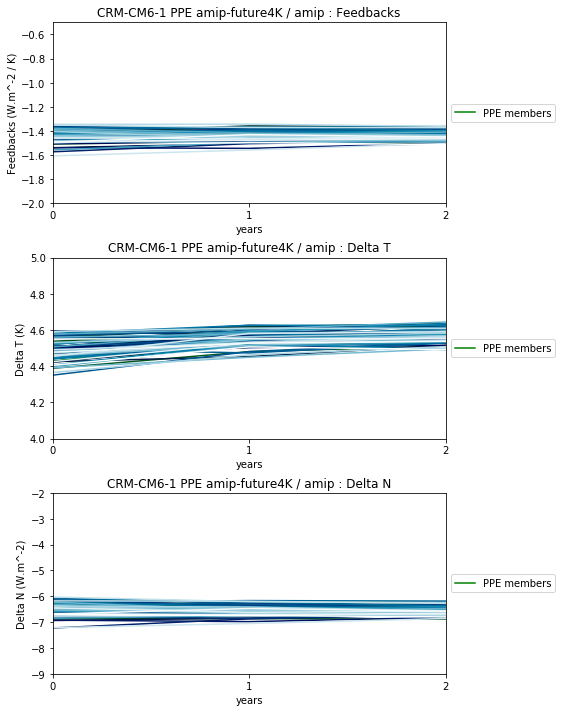

In [32]:
# PARAMETERS
df = result
cmap1 = plt.get_cmap('ocean')
xlabel='years'
xmin = 0
xmax = 2
legend=['PPE members']
linewidth = [1.5]

N=len(amip)+1
j=0
while j<N:
    linewidth.append(1.5)
    j=j+1
#--------------------------- Plot result : future4K --------------------------------------
plt.subplots(figsize=(8,10))

#########################
plt.subplot(311)
title="CRM-CM6-1 PPE amip-future4K / amip : Feedbacks"
ymin = -2.0
ymax = -0.5

n=len(amip)
colors = [cmap1(0)]*(n+len(amip))
y=[None]*N
y[:] = ['Lambda_'+j+'_future4k' for j in nb_p_list]
colors[:] = [cmap1(i) for i in np.linspace(0, 1, len(amip))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Feedbacks (W.m^-2 / K)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#########################
plt.subplot(312)
title='CRM-CM6-1 PPE amip-future4K / amip : Delta T'
ymin = 4.0
ymax = 5.0


y[:] = ['Delta_tas_'+i+'_future4k' for i in nb_p_list]
colors[:] = [cmap1(j) for j in np.linspace(0, 1, len(amip))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta T (K)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#########################
plt.subplot(313)
title='CRM-CM6-1 PPE amip-future4K / amip : Delta N'
ymin = -9.0
ymax = -2.0

y[:] = ['Delta_N_'+i+'_future4k' for i in nb_p_list]
colors[:] = [cmap1(i) for i in np.linspace(0, 1, len(amip))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta N (W.m^-2)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/PPE_feedbacks_DT_DN_ENSEMBLE3.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()

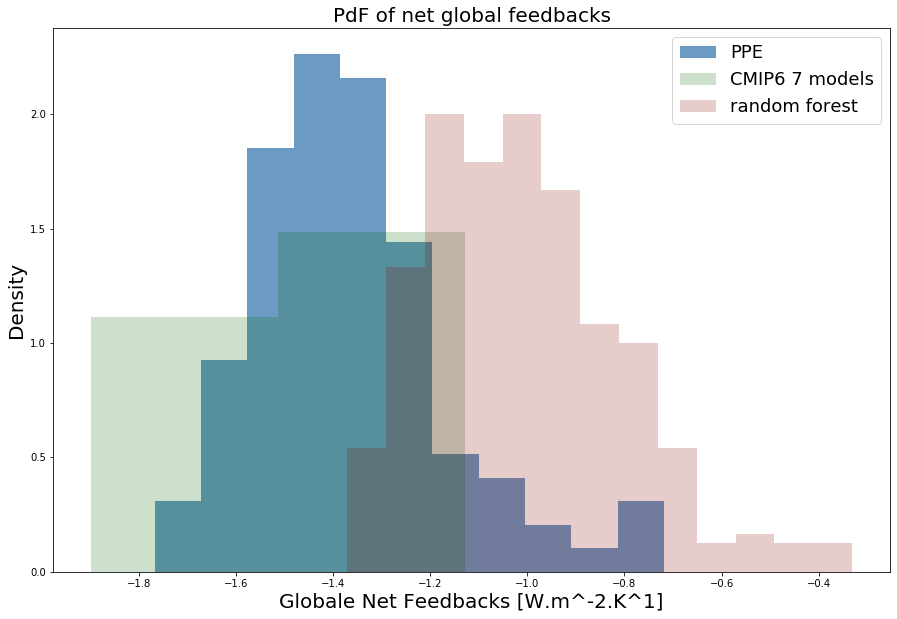

In [40]:
CMIP6 = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/CMIP6_NetFeedbcks.npy") 
emulated = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/emulated_NetFdbck.npy")

# Create plot of PDF of net feedbacks emulated by neural network 

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.distplot(NetFdbck, norm_hist= True, kde = False, 
                  hist_kws={"alpha": 0.8, "color" : 'steelblue'}, label = 'PPE', ax=ax)
ax = sns.distplot(CMIP6, norm_hist=True, kde = False,
                  hist_kws={"alpha": 0.2, "color" : 'darkgreen'}, label= 'CMIP6 7 models', ax=ax)
ax = sns.distplot(emulated, norm_hist=True, kde = False, 
                 hist_kws={"alpha": 0.2, "color" : 'darkred'}, label= 'random forest', ax=ax)
plt.title("PdF of net global feedbacks",
          fontsize=20)
plt.legend(fontsize=18)
plt.xlabel('Globale Net Feedbacks [W.m^-2.K^1]',fontsize=20)
plt.ylabel('Density',fontsize=20)

# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/normed_PDF_feedbacks.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()